# Task 2.2: Machine Learning

In this task a machine learining model which will simulate an A/B test will be created.After we get this model it will be put to the test and will be checked for its accuracy.

Import much needed **libraries**.

In [74]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [13]:
sns.set()
import warnings
warnings.filterwarnings('ignore')
path='C:/Users/chuna/Downloads/week4/AdSmartABdata.csv'
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


Define a function that plots **Tested** data points vs **Pridicted** ones.

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(20,15))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

Define a function that calculates the **metrics** of accuracy.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

**Import** data as csv

In [45]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1YSn01vvlHKQaAIBtwIXRNd-oTaTuDN09"}) 
downloaded.GetContentFile('ABAdRecall.csv')
import pandas as pd
data=pd.read_csv('ABAdRecall.csv')
data.head()
df=data

In [19]:
df_grouped = df.groupby('experiment').agg(yes=('yes', 'sum'),no=('no','sum'))

df_grouped['total']=df_grouped['yes']+df_grouped['no']#################remove33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
df_grouped

,yes,no,total
experiment,,,
control,264,322,586
exposed,308,349,657


In [46]:
df_control=df.loc[df['experiment'] == 'control']
df_exposed=df.loc[df['experiment'] == 'exposed']
df_control

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [64]:
df_exposed_clean=df_exposed.drop(df_exposed[(df_exposed.yes == 0) & (df_exposed.no == 0)].index)
df_control_clean=df_control.drop(df_control[(df_control.yes == 0) & (df_control.no == 0)].index)
df_exposed_clean


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1
...,...,...,...,...,...,...,...,...,...
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,0
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0


Check for any **NaN** values

In [65]:
df_control_clean.isnull().values.any()

False

In [ ]:
df_control_clean.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [49]:
df_exposed_clean.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

# Data Wrangling

In [68]:
data_total = pd.concat([df_exposed, df_control])
data_total

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [69]:
data_total=data_total.drop(data_total[(data_total.yes == 0) & (data_total.no == 0)].index)
data_total

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1
...,...,...,...,...,...,...,...,...,...
8004,fd1b8ea5-5397-4fae-a7f6-3c11fa3cef70,control,2020-07-03,15,Samsung SM-G975F,6,Samsung Internet,1,0
8010,fd53005c-f3f1-4f7d-97cc-84fab926bcaa,control,2020-07-04,4,Generic Smartphone,6,Chrome Mobile,0,1
8031,fe42a3c3-3e1e-40c9-b029-6b0ee9702aaa,control,2020-07-10,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1


Add day as a column(**DOW**).

In [70]:
data_total["experiment"].replace({"exposed": 1, "control": 0}, inplace=True)
data_total['date'] = pd.to_datetime(data_total['date']) 
data_total['DOW'] = data_total['date'].dt.day_name() 
  


data_total.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,DOW
6851,d97c5289-6836-426d-a402-6aac1fec97a9,1,2020-07-03,13,OnePlus ONEPLUS A3000,6,Chrome Mobile WebView,1,0,Friday
1978,4127c6a8-df3c-43be-9692-160978e24ee1,0,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,Friday
2973,5f8b891c-ae33-41a3-bd9f-7a8b5238b7ae,1,2020-07-07,3,Samsung SM-G973F,6,Samsung Internet,0,1,Tuesday
3543,729284de-66d1-4f14-8f42-6b1db1e6473e,0,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,1,0,Friday
4811,99740d86-02c1-4cb4-aeca-827cd6f70cfb,0,2020-07-04,22,LG-$2,6,Facebook,1,0,Saturday
1239,285e08bd-a53d-40e6-a44a-88820ee223dc,1,2020-07-04,2,Generic Smartphone,6,Chrome Mobile,0,1,Saturday
2998,6097d7ca-c6ed-43ea-a127-a1c158e551ae,0,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,Friday
4405,8c731921-5cbe-48d7-9055-8ea751c15391,0,2020-07-08,15,Samsung SM-A405FN,6,Samsung Internet,0,1,Wednesday
5644,b2871417-e53c-49a2-86e1-8b19ac9e57d7,0,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,Friday
2984,60079877-1f31-42ea-9336-ff20fdfad39c,0,2020-07-04,3,Generic Smartphone,6,Chrome Mobile,0,1,Saturday


In [52]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8077 entries, 0 to 8076
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   int64         
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
 9   DOW          8077 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 694.1+ KB


Remove `Date` and any missing data.Then shuffle the data set.

In [71]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date columns
del data_total['date']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)


In [72]:
data_total

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no,DOW
4157,8587f5fd-d3ac-4f9d-8fae-0261625a8b30,0,15,Generic Smartphone,6,Chrome Mobile,1,0,Friday
3742,7886e538-d171-497f-9120-419aa7593dfa,1,17,Samsung SM-A507FN,6,Chrome Mobile WebView,1,0,Thursday
701,16635abc-4436-46ac-ac92-92119d473f65,1,19,Generic Smartphone,6,Chrome Mobile,1,0,Thursday
6077,c0fad09f-ccdd-45b0-a658-6e9f43739e80,1,10,Samsung SM-G970F,6,Chrome Mobile WebView,1,0,Friday
7681,f32cd9f2-976a-41a4-873a-0cc074b7db53,0,15,Samsung SM-G930F,6,Samsung Internet,1,0,Friday
...,...,...,...,...,...,...,...,...,...
2813,5aacbe2c-080f-4542-a289-2f147fa71606,1,9,Generic Smartphone,6,Chrome Mobile,0,1,Friday
6058,c080c340-5287-44b3-9469-ffc4b4889cec,1,20,Generic Smartphone,6,Chrome Mobile,1,0,Thursday
6671,d3bad2f2-1619-413b-96c9-460ca19c4ab3,1,0,Samsung SM-A310F,6,Samsung Internet,1,0,Thursday
7851,f91d352a-c079-49da-81e8-9e40cb9d0dc4,0,9,Samsung SM-N975F,6,Samsung Internet,0,1,Wednesday


Change all independent variables to numerical values.They will be **labelled** a new number as per their previous entry.

In [73]:
data_total = data_total[['auction_id', 'hour', 'device_make', 'platform_os', 'browser', 'yes', 'no','experiment']]
data_total['row_id'] = data_total.index
data_total=data_total.drop(['auction_id'],axis=1)
data_total=data_total.drop(['device_make'],axis=1)
lb = LabelEncoder()
data_total['browser'] = lb.fit_transform(data_total['browser'])

data_total


,hour,platform_os,browser,yes,no,experiment,row_id
4157,15,6,1,1,0,0,4157
3742,17,6,2,1,0,1,3742
701,19,6,1,1,0,1,701
6077,10,6,2,1,0,1,6077
7681,15,6,7,1,0,0,7681
...,...,...,...,...,...,...,...
2813,9,6,1,0,1,1,2813
6058,20,6,1,1,0,1,6058
6671,0,6,7,1,0,1,6671
7851,9,6,7,0,1,0,7851


# Split data into Training ,Testing and Validatting

Since we are going to pridict for **yes**,it is separated from the rest.Also **`row_id`** and **`no`** columns are because they are irrelevant for our prediction.**Row_id** is randomly assigned and shouldnt stir our prediction.

On the other hand the **`no`** column is removed because had we known its value this all prediction would be to no avail.

In [77]:

survived =  data_total['yes']                                       #data_total.iloc[:, [5]]
titanic = data_total.drop(['yes'],axis=1)
titanic = titanic.drop(['row_id'],axis=1)
titanic = titanic.drop(['no'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(titanic, survived, test_size = 0.2, random_state=42)
titanic

,hour,platform_os,browser,experiment
4157,15,6,1,0
3742,17,6,2,1
701,19,6,1,1
6077,10,6,2,1
7681,15,6,7,0
...,...,...,...,...
2813,9,6,1,1
6058,20,6,1,1
6671,0,6,7,1
7851,9,6,7,0


In [78]:
survived

4157    1
3742    1
701     1
6077    1
7681    1
       ..
2813    0
6058    1
6671    1
7851    0
2427    0
Name: yes, Length: 1243, dtype: int64

Next we are going to create different models and take the best one using **GridSearch.**

In [82]:
# Create logistic regression object
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'
penalty = ['l1', 'l2']
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'
C = [0.0001, 0.001, 0.01, 1, 100]
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict(C=C, penalty=penalty)
# Fit your model using gridsearch
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X, Y)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)
# You can also print the best penalty and C value individually from best_model.best_estimator_.get_params()
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
best_model

Best Parameters {'C': 0.01, 'penalty': 'l2'}
Best Penalty: l2
Best C: 0.01


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

After we have the best model we will predict with it.We can seehow many we missed using **Confusion matrix.**

In [83]:
from sklearn.metrics import confusion_matrix
y_preds = best_model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_preds)

print(confusion_matrix)



[[121   8]
 [104  16]]


Our **accuracy** is follows

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds, normalize=True)

0.5502008032128514

The raw **Pridicted** data is shown below.

In [ ]:
y_test=np.array(y_test)
y_test

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [85]:
calculate_metrics(y_test, y_preds)

RMSE Score: 0.670670706671425
R2_Squared: -0.801550387596899
MAE Score: 0.4497991967871486


Plot of **predicted** data and **test** data.

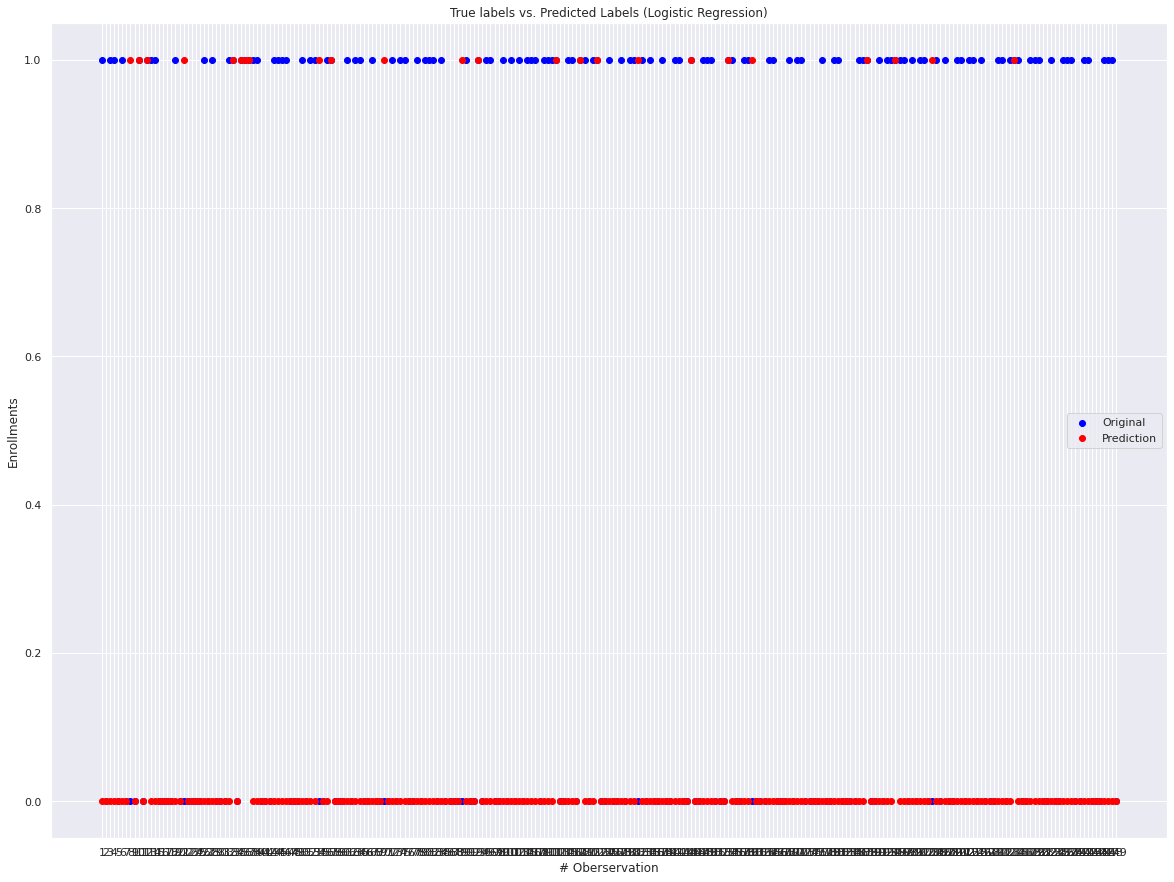

In [86]:
plot_preds(y_test, y_preds, 'Logistic Regression')

# Model 02: Decision Tree

In [86]:
For decision tree we will use pre determined parameters which consider K-fold as 5.

In [111]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
clf_gini.fit(x_train, y_train) 
y_preds=clf_gini.predict(x_test)

We also calculate here accuracy and its lower than **Logistic regression.**

In [112]:
accuracy_score(y_test, y_preds, normalize=True)

0.5220883534136547

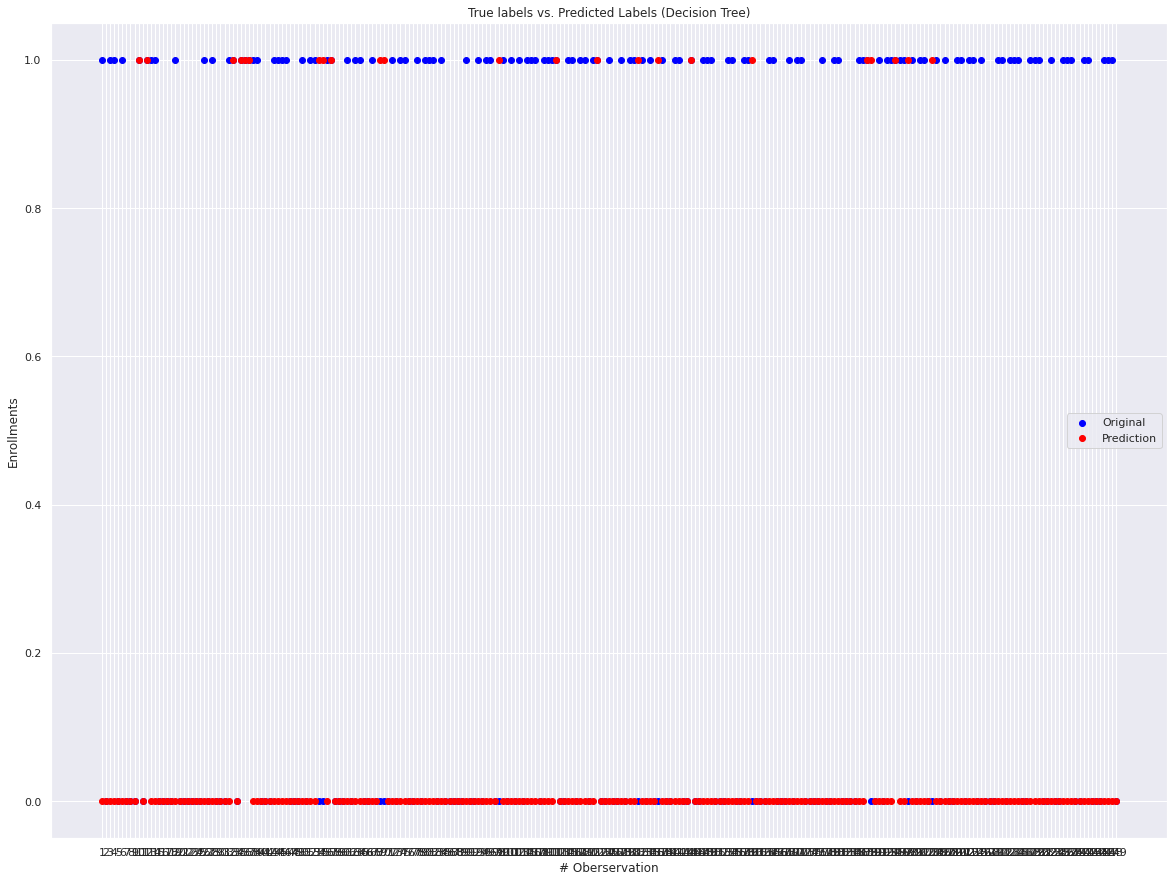

In [110]:
plot_preds(y_test, y_preds, 'Decision Tree')

In [113]:
calculate_metrics(y_test, y_preds)

RMSE Score: 0.6913115409034811
R2_Squared: -0.9141472868217053
MAE Score: 0.4779116465863454


# XGBoost

In [114]:
import xgboost as xgb

Lets refresh our memory

In [115]:
x_train

,hour,platform_os,browser,experiment
6344,7,6,1,1
5270,15,6,7,0
4858,17,6,1,0
144,2,6,2,1
7718,15,6,7,0
...,...,...,...,...
7546,4,6,1,1
5878,12,6,1,0
7076,7,6,1,0
6290,3,6,1,1


In [116]:
y_train

6344    1
5270    0
4858    1
144     1
7718    0
       ..
7546    1
5878    0
7076    0
6290    0
2488    0
Name: yes, Length: 994, dtype: int64

In [94]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 6344 to 2488
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   hour         994 non-null    int64
 1   platform_os  994 non-null    int64
 2   browser      994 non-null    int64
 3   experiment   994 non-null    int64
dtypes: int64(4)
memory usage: 38.8 KB


In [95]:
DM_train = xgb.DMatrix(data=x_train,label=y_train)
DM_test = xgb.DMatrix(data=x_test,label=y_test)

The below parameters are considering k fold-5.

In [117]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [119]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
print(model)
# make predictions for test data
y_preds = model.predict(x_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [120]:
accuracy_score(y_test, y_preds, normalize=True)

0.5180722891566265

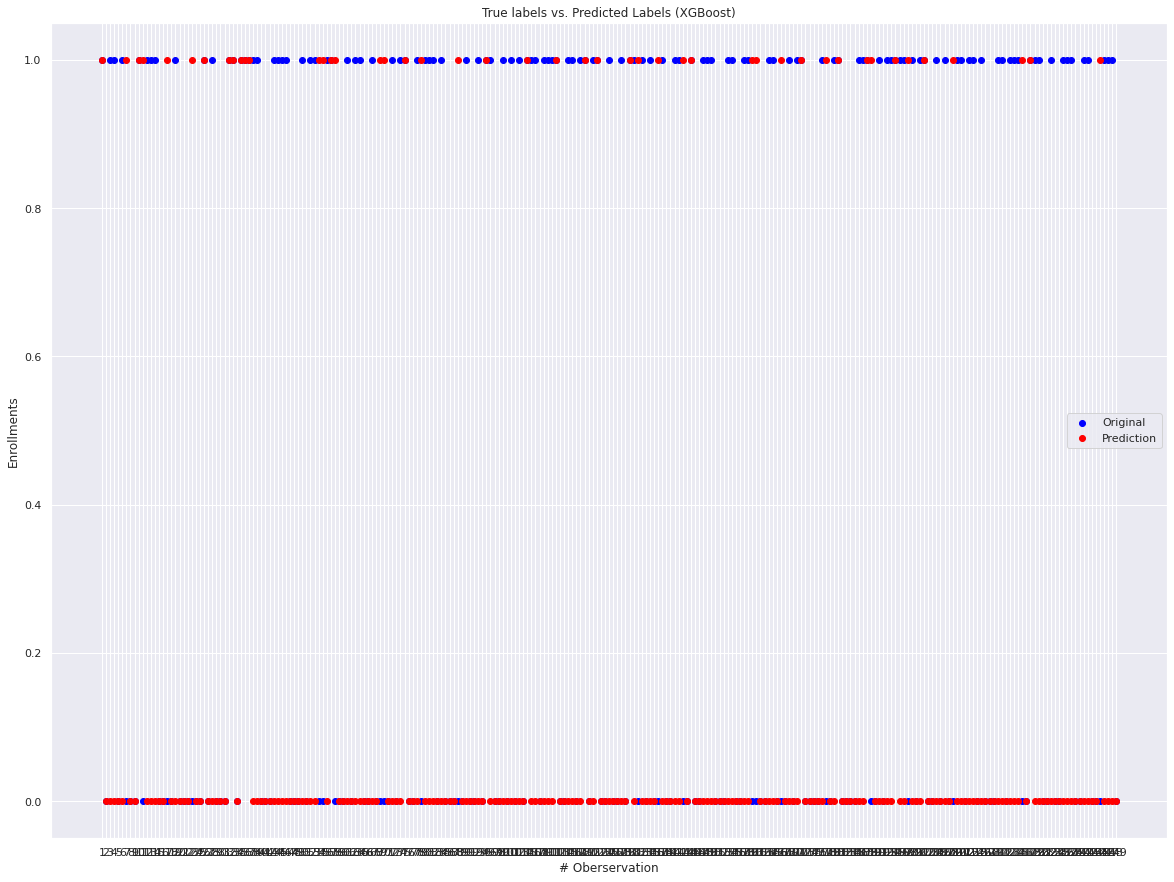

In [121]:
plot_preds(y_test, y_preds, 'XGBoost')

# Feature importance

Which feature had the highest impact on our **"yes"** values. 

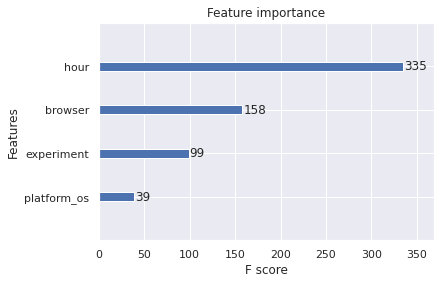

In [122]:
from xgboost import XGBClassifier, plot_importance
plot_importance(model)

In [ ]:
Discussion about usage of A/B testing, k-fold and Machine learning approach are discused on the paper.
 

# Cheers!!!